# Image Based Sports Classification

## Library Imports

In [1]:
# usual imports
import pandas as pd
import numpy as np

# handle os specific
import os

# randomization
import random

# visualization imports 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline
import tensorflow
from tensorflow import keras

# consistent plot size
from pylab import rcParams
rcParams['figure.figsize'] = 17,7
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
rcParams['axes.titlesize'] = 16
 
# ignore deprecated and future warnings
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [3]:
# !pip install --user --upgrade tensorflow-gpu

## Setting Directory Paths

In [4]:
# check the root dir
os.listdir('C:/Users/DEVU/Downloads/datasetaff9788/dataset')

['test', 'test.csv', 'train', 'train.csv']

In [5]:
# set the path
ROOT_DIR = 'C:/Users/DEVU/Downloads/datasetaff9788/dataset'
FILE_PATH = os.path.join(ROOT_DIR)

In [6]:
# LIST DIRCTORIES INSIDE THE FILE PATH
os.listdir(FILE_PATH)

['test', 'test.csv', 'train', 'train.csv']

There are two directories - train and test. Rest are all the csv files. Lets explore the train directory. Data dir indicated there are no sub folders and all images are in the same directory. 

In [7]:
# SET THE TRAINING AND THE TEST PATH
TRAIN_PATH = os.path.join(FILE_PATH,'train')
TEST_PATH = os.path.join(FILE_PATH,'test')

In [8]:
os.listdir(TRAIN_PATH)

['00133e413b.jpg',
 '001d7af96b.jpg',
 '001f785876.jpg',
 '002346961f.jpg',
 '0029933109.jpg',
 '002d6c03d6.jpg',
 '0033a39b8e.jpg',
 '00473a616a.jpg',
 '004f313f60.jpg',
 '005405aa7c.jpg',
 '0055d865dc.jpg',
 '006c4e6607.jpg',
 '006deb6610.jpg',
 '007347a992.jpg',
 '0083ed05cf.jpg',
 '009a1d56c4.jpg',
 '009dafe8f4.jpg',
 '009ebfeac2.jpg',
 '00a87b6bb3.jpg',
 '00bca71f3b.jpg',
 '00bfe31734.jpg',
 '00d4ec9692.jpg',
 '00db6efcb9.jpg',
 '00edf6dae0.jpg',
 '010850e380.jpg',
 '0109c4b746.jpg',
 '01364b4cf8.jpg',
 '0137a6b7a9.jpg',
 '01418262f4.jpg',
 '014336f8fd.jpg',
 '0145f9f302.jpg',
 '01549b19ae.jpg',
 '015b4703e6.jpg',
 '015b7fb11f.jpg',
 '015d00b47e.jpg',
 '015f0ad8c8.jpg',
 '016064d887.jpg',
 '016cd65257.jpg',
 '0184ace2e3.jpg',
 '0184d802fb.jpg',
 '0196536cbf.jpg',
 '01a3110d73.jpg',
 '01a6af031e.jpg',
 '01a8c1676d.jpg',
 '01bd71c4c1.jpg',
 '01e444e958.jpg',
 '01ea535330.jpg',
 '01f9bc2bf5.jpg',
 '020e1655cf.jpg',
 '0215dce331.jpg',
 '021ee93a27.jpg',
 '02235e998b.jpg',
 '0241f4a896

In [9]:
os.listdir(TEST_PATH)

['00065391ce.jpg',
 '002259d705.jpg',
 '002aca3053.jpg',
 '00772b60e9.jpg',
 '0093b6cbc3.jpg',
 '00b1df8c4f.jpg',
 '00c7075215.jpg',
 '00e1276bac.jpg',
 '00ee32c765.jpg',
 '00f9a096fe.jpg',
 '013d44bfd8.jpg',
 '01629d58ca.jpg',
 '0165ea57ea.jpg',
 '0179a2bf4b.jpg',
 '01b33ff026.jpg',
 '01c67f4e37.jpg',
 '01c75f606c.jpg',
 '020f5ea36a.jpg',
 '021ec80020.jpg',
 '022dc8a23a.jpg',
 '02462bb635.jpg',
 '0253d388e8.jpg',
 '026117c40a.jpg',
 '026ed5c7a0.jpg',
 '027bf70a66.jpg',
 '0283662fc5.jpg',
 '02a42304dc.jpg',
 '02bb3f939c.jpg',
 '02e3452152.jpg',
 '032375da4a.jpg',
 '032f793f78.jpg',
 '03345fcf40.jpg',
 '0337edd3d1.jpg',
 '036274a32a.jpg',
 '0386d531f8.jpg',
 '039e54abd5.jpg',
 '03a3043f3e.jpg',
 '03b566591d.jpg',
 '03dae9890e.jpg',
 '03fc6b05c9.jpg',
 '0432543264.jpg',
 '045dd27f51.jpg',
 '047bee516b.jpg',
 '04b0c82991.jpg',
 '04b282ddb5.jpg',
 '04b46d7eb4.jpg',
 '04f3bd7447.jpg',
 '04ff719903.jpg',
 '0543818e52.jpg',
 '056af037db.jpg',
 '058f8aa5eb.jpg',
 '05a48a20a3.jpg',
 '05aaf237c0

In [10]:
TRAIN_IMAGES = os.path.join(TRAIN_PATH)
TEST_IMAGES = os.path.join(TEST_PATH)

In [11]:
len(os.listdir(TRAIN_IMAGES))

8227

In [12]:
len(os.listdir(TEST_IMAGES))

2056

In [13]:
# READ THE TRAIN csv FILE CONTAINING THE SPORTS LABEL
train_df = pd.read_csv(os.path.join(FILE_PATH,'train.csv'))

In [14]:
# READ THE test csv FILE
test_df = pd.read_csv(os.path.join(FILE_PATH,'test.csv'))
test_df.tail()

,image_ID
2051,7be6c552a7.jpg
2052,4c9427f2a5.jpg
2053,0f429ae0d4.jpg
2054,a6557bedd9.jpg
2055,76266fd445.jpg


In [15]:
# LIST THE FIRST FEW ROWS
train_df.head(10)

,image_ID,label
0,7c225f7b61.jpg,Badminton
1,b31.jpg,Badminton
2,acb146546c.jpg,Badminton
3,0e62f4d8f2.jpg,Badminton
4,cfd2c28c74.jpg,Cricket
5,e06a27208d.jpg,Tennis
6,44771fadd2.jpg,Badminton
7,da4d3e218c.jpg,Swimming
8,b956f3bba8.jpg,Badminton
9,d02a1baab5.jpg,Badminton


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8227 entries, 0 to 8226
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_ID  8227 non-null   object
 1   label     8227 non-null   object
dtypes: object(2)
memory usage: 128.7+ KB


In [17]:
len(train_df['label'].unique())

7

### Summary based on data directory organization
- Images are organized in train and test dir
- All the train images are in the same directory and not in directories of their respective class. 
- There are 7 sports covered by the various images
- The dataframe has the full filename with the extension. 
- There are over 8227 images in the training folder and roughly 2,056 images in the test folder

Important Consideration
-  Later I wanted to use the data augmentation using ImageDataGenerator class in Keras. Instead of flowfrom directory, I will need to use flow from dataframe.

## Data Exploration
- Display images and corresponding labels
- Check whether the data balanced --- > total image representation of various sports 
- Image sizes -- > to determine the input shape later in the model
- Variation in a particular sport's images

In [18]:
# Extract the unique labels
sports_labels = train_df['label'].unique()

In [19]:
# LIST THE SPORTS NAME INCLUDED IN THE DATASET
sports_labels

array(['Badminton', 'Cricket', 'Tennis', 'Swimming', 'Soccer',
       'Wrestling', 'Karate'], dtype=object)

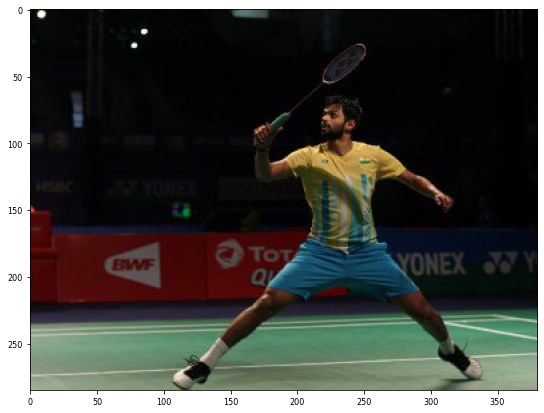

In [20]:
# CHECK ONE OF THE IMAGES -- > LETS PICK THE FIRST IN THE LIST
plt.imshow(imread(os.path.join(TRAIN_IMAGES,'7c225f7b61.jpg')));

In [21]:
# CHECK THE CLASS NAME OF THE DISPLAYED SPORT
train_df['label'][7]

'Swimming'

In [22]:
# IMAGE COUNT PER SPORT
train_df['label'].value_counts()

Cricket      1556
Wrestling    1471
Tennis       1445
Badminton    1394
Soccer       1188
Swimming      595
Karate        578
Name: label, dtype: int64

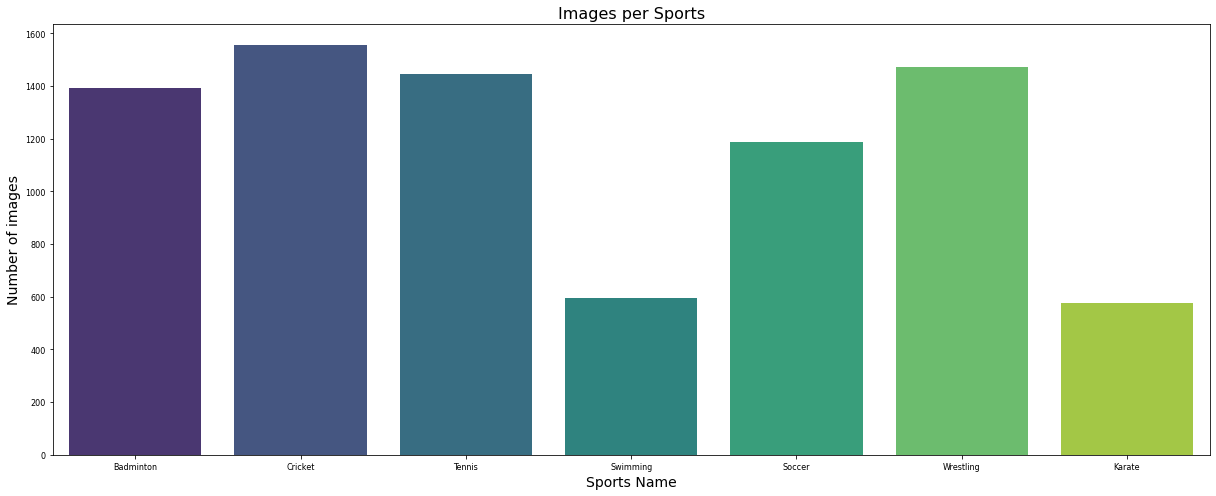

In [23]:
# VISUALIZE IMAGE COUNT PER SPORT
sns.countplot(train_df['label'],palette='viridis')
plt.title('Images per Sports',)
plt.ylabel('Number of images')
plt.xlabel('Sports Name')
plt.tight_layout()

**Cricket and wrestling has the maximum number of images in the dataset. Swimming is the least. Broadly, the data does not seem to be biased for a particular sport.**

### Check the dimensions of the images
We do not know for sure the size/shape of the images. They all can be same or different. This needs to be determined so that it can be fed as a hyper-parameter in the image data generator. 

This might consume some time. Hence after the first run, better to comment this out. 

In [26]:
#RETRIEVE THE DIMENSION OF ALL THE TRAINING IMAGES
# dim1 = []
# dim2 = []

# for image in os.listdir(TRAIN_IMAGES):
#     img = imread(os.path.join(TRAIN_IMAGES,image))
#     d1,d2 = img.shape[0], img.shape[1]
#     dim1.append(d1)
#     dim2.append(d2)  

In [27]:
# print(f'Dimension 1 range is {np.min(dim1)} to {np.max(dim1)} and the range for dimension 2 is {np.min(dim2)} to {np.max(dim2)}')

In [28]:
# # CHECK THE MODE OF THE DIMENSIONS
# # from statistics import mode
# print (f'The most frequently occuring dimensions are {mode(dim1)} and {mode(dim2)}')

In [29]:
#TAKE THE MEAN OF THE DIMENSIONS OF THE IMAGES AND SET IT AS INPUT SHAPE, PLUS ANOTHER DIMENSION FOR COLOR
#IMAGE_SHAPE = (int(np.mean(dim1)),int(np.mean(dim2)),3)

In [30]:
# IMAGE_SHAPE = (224,224,3)

## Data Preparation

In [31]:
# IMPORT THE REQUIRED KERAS LIBRARIES FOR IMAGE AUGMENTATION
!pip install keras==2.3.0


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [34]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.xception import preprocess_input

In [35]:
image_generator = ImageDataGenerator(    
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.5,
    zoom_range=[0.5,1.8],
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    preprocessing_function=preprocess_input,
    data_format=None,
    validation_split=0.2,
    dtype= 'float32'
)

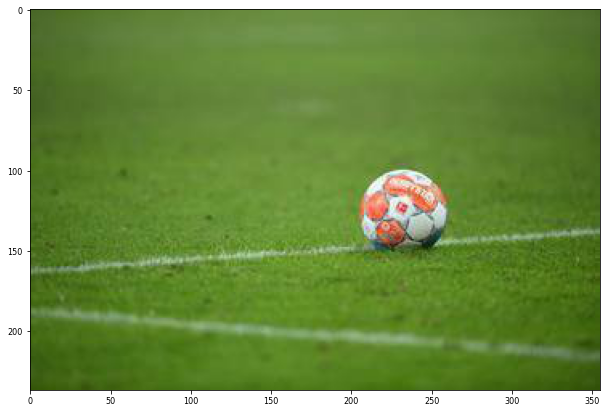

In [36]:
# DISPLAY THE ORIGINAL AND THE GENERATED IMAGES
image = imread(os.path.join(TRAIN_IMAGES,'6c1e24a12a.jpg'))
plt.imshow(image)

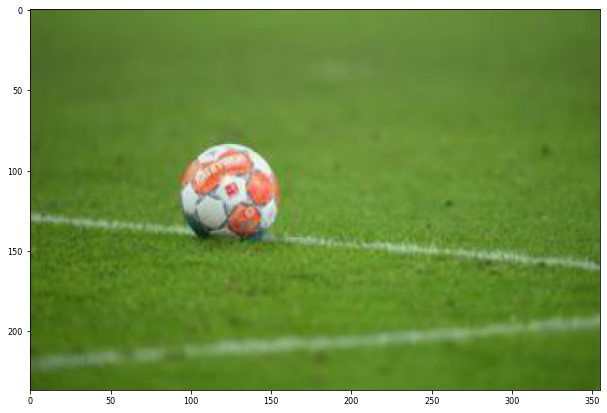

In [37]:
gen_image = image_generator.random_transform(image)
plt.imshow(gen_image)

### Create the training and validation generators. 

In [89]:
# DEFINE THE BATCH SIZE 
BATCH_SIZE = 30

In [39]:
# CREATE THE TRAINING GENERATOR 
train_generator = image_generator.flow_from_dataframe(dataframe=train_df,
                                                      directory=TRAIN_PATH,
                                                      x_col='image_ID',
                                                      y_col='label',
                                                      subset='training',
                                                      color_mode='rgb',
                                                      batch_size=BATCH_SIZE,
                                                      seed=42,
                                                      shuffle=True,
                                                      class_mode='categorical',
                                                      target_size=(224,224))

train_generator

Found 6582 validated image filenames belonging to 7 classes.


In [40]:
# CREATE THE VALIDATION GENERATOR 
validation_generator = image_generator.flow_from_dataframe(dataframe=train_df,
                                                           directory=TRAIN_PATH,
                                                           x_col='image_ID',
                                                           y_col='label',
                                                           subset='validation',
                                                           color_mode='rgb',
                                                           batch_size=BATCH_SIZE,
                                                           seed=42,
                                                           shuffle=False,
                                                           class_mode='categorical',
                                                           target_size=(224,224))

validation_generator

Found 1645 validated image filenames belonging to 7 classes.


In [41]:
# TEST GENERATOR ... NO SHUFFLE & CLASS MODE SET TO NONE
test_generator = image_generator.flow_from_dataframe(dataframe=test_df,
                                                     directory=TEST_PATH,
                                                     x_col='image_ID',
                                                     y_col=None,
                                                     batch_size=BATCH_SIZE,
                                                     color_mode='rgb',
                                                     seed=42,
                                                     shuffle=False,
                                                     class_mode=None,
                                                     target_size=(224,224))

test_generator

Found 2056 validated image filenames.


## Build the Model

### Step 1: Experiment with a basic model

In [42]:
## IMPORT THE LIBRARIES
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,AvgPool2D,GlobalMaxPool2D,Flatten,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.callbacks import CSVLogger

In [43]:
trial = 4

In [44]:
if trial==1: # Basic Model
    
        
    ## DEFINE THE BASIC MODEL
    model =  Sequential()

    # ADD CONVOLUTIONAL LAYERS and MaxPooling Layer -- > Typical CNN Model
    model.add(Conv2D(filters=32,kernel_size=(7,7),input_shape=IMAGE_SHAPE,strides=1,padding='valid',activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
        
    model.add(Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
        
    model.add(Conv2D(filters=128,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
        
    model.add(Conv2D(filters=256,kernel_size=(3,3),strides=1,padding='valid',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
        
    # ADD DENSE LAYERS
    model.add(Flatten())
    model.add(Dense(units=512,activation='relu'))
    model.add(Dense(units=128,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=7,activation='softmax'))
    
    
    # COMPILE THE BASIC MODEL 
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])  
       
    # PRINT MODEL SUMMARY
    print('BASIC MODEL')
    model.summary()
    
elif trial==2: # Batch Normalization plus selu actiovation and lecun-normal kernel initializer
    model = Sequential()
    
    # Add the CNN layers 
    model.add(Conv2D(filters=32,input_shape=IMAGE_SHAPE,padding='valid',kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    
    model.add(Conv2D(filters=64,padding='valid',kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    
    model.add(Conv2D(filters=128,padding='valid',kernel_size=(3,3),activation='relu'))
    model.add(MaxPooling2D(2,2))
    
    # ADD THE DNN LAYERS
    model.add(Flatten())
    model.add(BatchNormalization())
    
    model.add(Dense(units=256,activation='selu',kernel_initializer='lecun_normal',use_bias=False))
    model.add(BatchNormalization())
    
    model.add(Dense(units=128,activation='selu',kernel_initializer='lecun_normal',use_bias=False))
    model.add(BatchNormalization())
    
    model.add(Dense(units=64,activation='selu',kernel_initializer='lecun_normal',use_bias=False))
    model.add(BatchNormalization())
    
    model.add(Dense(units=32,activation='selu',kernel_initializer='lecun_normal',use_bias=False))
    model.add(BatchNormalization())
    
    model.add(Dense(units=7,activation='softmax'))
    
    # COMPILE THE MODEL
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    print('Model with Batch Normalization')
    model.summary()
    
elif trial==3:    # VGG16 Pre Trained Model - SGD as well as Adam -- > Adam performs faster and returns better accuracy
    base_model = VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet')
    # mark loaded layers as not trainable
    for layer in base_model.layers:
        layer.trainable = False
    # add new classification layers
    flat1 = Flatten()(base_model.layers[-1].output)
    class1 = Dense(512,activation='relu',kernel_initializer='he_normal')(flat1)
    class2 = Dense(256,activation='relu',kernel_initializer='he_normal')(class1)
    class3 = Dense(128,activation='relu',kernel_initializer='he_normal')(class2)
    output = Dense(7,activation='softmax')(class3)
    # define new model
    model = Model(inputs=base_model.inputs,outputs=output)
    #compile the model
    # opt = SGD(lr=0.001,momentum=0.9,nesterov=True)
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
    
    print('Transfer Learning based on VGG16')
    model.summary()
    
else:
    base_model = Xception(include_top=False,input_shape=(224,224,3),weights='imagenet')
    # mark loaded layers as not trainable
    for layer in base_model.layers:
        layer.trainable = False
    # add new classification layers
    #avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
    flat1 = Flatten()(base_model.layers[-1].output)
    class1 = Dense(512,activation='relu',kernel_initializer='he_normal')(flat1)
    class2 = Dense(256,activation='relu',kernel_initializer='he_normal')(class1)
    class3 = Dense(128,activation='relu',kernel_initializer='he_normal')(class2)
    output = Dense(7,activation='softmax')(class3)
    # define new model
    model = Model(inputs=base_model.inputs,outputs=output)
    #compile the model
    # opt = SGD(lr=0.001,momentum=0.9,nesterov=True)
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
    
    print('Transfer Learning based on Xception Module')
    model.summary()  


Transfer Learning based on Xception Module
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________

C:\Users\DEVU\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [45]:
# DEFINE CALLBACKS ---- > EARLY STOP AND REDUCE LEARNING RATE ON PLATEAU
early_stop = EarlyStopping(patience=9,monitor='val_loss',restore_best_weights=True)
#reduce_lr = ReduceLROnPlateau(patience=2,monitor='val_loss',factor=0.1)
csv_logger = CSVLogger('epoch_run_transfer_Xception.csv',separator=',',append=True)

In [46]:
# DEFINE THE STEPS_PER_EPOCH
STEP_SIZE_TRAIN = (train_generator.n // train_generator.batch_size)  
print(STEP_SIZE_TRAIN)
STEP_SIZE_VALIDATION = (validation_generator.n // validation_generator.batch_size)   
STEP_SIZE_TEST = (test_generator.n // test_generator.batch_size)

219


## Fit the Model

In [47]:
## FIT THE MODEL
model.fit(train_generator,
                   steps_per_epoch=STEP_SIZE_TRAIN,
                   validation_data=validation_generator,
                   validation_steps=STEP_SIZE_VALIDATION,
                   epochs=80,
                   callbacks=[early_stop,csv_logger]
                   )

Epoch 1/80
219/219 [==============================] - 416s 2s/step - loss: 1.8527 - accuracy: 0.3077 - val_loss: 1.6245 - val_accuracy: 0.4019
Epoch 2/80
219/219 [==============================] - 415s 2s/step - loss: 1.6475 - accuracy: 0.3820 - val_loss: 1.6655 - val_accuracy: 0.3562
Epoch 3/80
219/219 [==============================] - 413s 2s/step - loss: 1.6087 - accuracy: 0.3915 - val_loss: 1.5407 - val_accuracy: 0.4327
Epoch 4/80
219/219 [==============================] - 410s 2s/step - loss: 1.5563 - accuracy: 0.4064 - val_loss: 1.4803 - val_accuracy: 0.4377
Epoch 5/80
219/219 [==============================] - 418s 2s/step - loss: 1.5262 - accuracy: 0.4309 - val_loss: 1.5204 - val_accuracy: 0.4216
Epoch 6/80
219/219 [==============================] - 415s 2s/step - loss: 1.4820 - accuracy: 0.4382 - val_loss: 1.4770 - val_accuracy: 0.4296
Epoch 7/80
219/219 [==============================] - 415s 2s/step - loss: 1.4599 - accuracy: 0.4545 - val_loss: 1.4008 - val_accuracy: 0.4759

In [48]:
help(model.fit)

Help on method fit in module tensorflow.python.keras.engine.training:

fit(x=None, y=None, batch_size=None, epochs=1, verbose='auto', callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None, validation_batch_size=None, validation_freq=1, max_queue_size=10, workers=1, use_multiprocessing=False) method of tensorflow.python.keras.engine.functional.Functional instance
    Trains the model for a fixed number of epochs (iterations on a dataset).
    
    Args:
        x: Input data. It could be:
          - A Numpy array (or array-like), or a list of arrays
            (in case the model has multiple inputs).
          - A TensorFlow tensor, or a list of tensors
            (in case the model has multiple inputs).
          - A dict mapping input names to the corresponding array/tensors,
            if the model has named inputs.
          - A `tf.data` dataset. Should return

In [49]:
base_model.trainable = True
opt = Adam(lr=0.00001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')


model.fit_generator(generator=train_generator,
                   steps_per_epoch=STEP_SIZE_TRAIN,
                   validation_data=validation_generator,
                   validation_steps=STEP_SIZE_VALIDATION,
                   epochs=40,
                   callbacks=[early_stop,csv_logger]
                   )


C:\Users\DEVU\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1969: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
219/219 [==============================] - 1898s 9s/step - loss: 4.9548 - accuracy: 0.2457 - val_loss: 3.5323 - val_accuracy: 0.1883
Epoch 2/40
219/219 [==============================] - 1931s 9s/step - loss: 1.6168 - accuracy: 0.4037 - val_loss: 1.5851 - val_accuracy: 0.4086
Epoch 3/40
219/219 [==============================] - 1857s 8s/step - loss: 1.2345 - accuracy: 0.5655 - val_loss: 1.0400 - val_accuracy: 0.6290
Epoch 4/40
219/219 [==============================] - 1900s 9s/step - loss: 0.9546 - accuracy: 0.6696 - val_loss: 0.8082 - val_accuracy: 0.7154
Epoch 5/40
219/219 [==============================] - 1916s 9s/step - loss: 0.7851 - accuracy: 0.7279 - val_loss: 0.6605 - val_accuracy: 0.7728
Epoch 6/40
219/219 [==============================] - 2005s 9s/step - loss: 0.6595 - accuracy: 0.7752 - val_loss: 0.5788 - val_accuracy: 0.7963
Epoch 7/40
219/219 [==============================] - 2043s 9s/step - loss: 0.5674 - accuracy: 0.8040 - val_loss: 0.5044 - val_accuracy:

In [55]:
model.save("my_Func_model.h5")

C:\Users\DEVU\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [ ]:
base_model.trainable = True
opt = Adam(lr=0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')


model.fit_generator(generator=train_generator,
                   steps_per_epoch=STEP_SIZE_TRAIN,
                   validation_data=validation_generator,
                   validation_steps=STEP_SIZE_VALIDATION,
                   epochs=5,
                   callbacks=[checkpoint_cb,csv_logger]
                   )


In [50]:
# EVALUATE THE MODEL ... 
model.evaluate_generator(generator=validation_generator)

C:\Users\DEVU\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2002: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.17319390177726746, 0.9458966851234436]

In [81]:
# model.history

In [80]:
# pd.DataFrame(model.history).plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca().set_ylim(0, 1)

# plt.show()

## Prepare for final model

Since validation accuracy we got is around 95% so Xception transferlearning is not done (It can take 2 days more to train the model with Xception learning, Code is written for a better processor PC)

In [52]:
# data_generator = ImageDataGenerator(    
#     featurewise_center=False,
#     samplewise_center=False,
#     featurewise_std_normalization=False,
#     samplewise_std_normalization=False,
#     zca_whitening=False,
#     zca_epsilon=1e-06,
#     rotation_range=0.1,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     brightness_range=None,
#     shear_range=0.5,
#     zoom_range=[0.5,1.8],
#     channel_shift_range=0.0,
#     fill_mode='nearest',
#     cval=0.0,
#     horizontal_flip=True,
#     vertical_flip=False,
#     rescale=1./255,
#     preprocessing_function=preprocess_input,
#     data_format=None,
#     validation_split=0.0,
#     dtype= 'float32'
# ) 
   

In [79]:
# # CREATE THE TRAINING GENERATOR 
# train_generator_full = data_generator.flow_from_dataframe(dataframe=train_df,
#                                                       directory=TRAIN_PATH,
#                                                       x_col='image_ID',
#                                                       y_col='label',
#                                                       subset='training',
#                                                       color_mode='rgb',
#                                                       batch_size=BATCH_SIZE,
#                                                       seed=42,
#                                                       shuffle=True,
#                                                       class_mode='categorical',
#                                                       target_size=(224,224))

# train_generator_full

In [ ]:
# model.fit_generator(generator=train_generator_full,
#                    steps_per_epoch=train_generator_full.n//train_generator_full.batch_size,
#                    epochs=35,
#                    callbacks=[early_stop]
#                    )

In [77]:
# RESET THE GENERATOR TO GET THE RESULTS IN THE RIGHT ORDER
test_generator.reset()


In [78]:
# GENERATE PREDICTIONS ON THE TEST DATA
predictions = model.predict_generator(test_generator)

C:\Users\DEVU\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2030: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [82]:
# RETRIEVE THE CLASS INDEX FOR WHICH THE PROBABILITY IS MAXIMUM ...hence np.argmax
predictions_class_index = np.argmax(predictions,axis=1)

In [83]:
# CHECK THE PREDICTED CLASS INDICES
predictions_class_index

array([3, 0, 0, ..., 6, 4, 1], dtype=int64)

In [84]:
# EXTRACT THE PREDICTION LABELS
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
final_predictions = [labels[k] for k in predictions_class_index]

In [85]:
# LIST THE FINAL PREDICTED LABELS
final_predictions

['Soccer',
 'Badminton',
 'Badminton',
 'Wrestling',
 'Tennis',
 'Tennis',
 'Cricket',
 'Tennis',
 'Swimming',
 'Soccer',
 'Swimming',
 'Soccer',
 'Swimming',
 'Cricket',
 'Wrestling',
 'Swimming',
 'Soccer',
 'Wrestling',
 'Cricket',
 'Cricket',
 'Cricket',
 'Wrestling',
 'Wrestling',
 'Karate',
 'Wrestling',
 'Karate',
 'Cricket',
 'Badminton',
 'Cricket',
 'Wrestling',
 'Soccer',
 'Badminton',
 'Cricket',
 'Swimming',
 'Soccer',
 'Tennis',
 'Wrestling',
 'Cricket',
 'Badminton',
 'Swimming',
 'Badminton',
 'Tennis',
 'Tennis',
 'Badminton',
 'Cricket',
 'Tennis',
 'Karate',
 'Badminton',
 'Badminton',
 'Badminton',
 'Cricket',
 'Tennis',
 'Tennis',
 'Soccer',
 'Cricket',
 'Cricket',
 'Swimming',
 'Soccer',
 'Cricket',
 'Tennis',
 'Wrestling',
 'Karate',
 'Soccer',
 'Badminton',
 'Tennis',
 'Wrestling',
 'Cricket',
 'Karate',
 'Soccer',
 'Badminton',
 'Soccer',
 'Karate',
 'Wrestling',
 'Cricket',
 'Wrestling',
 'Soccer',
 'Wrestling',
 'Tennis',
 'Soccer',
 'Wrestling',
 'Karate',
 

In [86]:
len(final_predictions)

2056

In [90]:
# PREPARE FOR SUBMISSION
filenames=test_generator.filenames
results=pd.DataFrame({"image":filenames,
                      "sports":final_predictions})
results.to_csv("C:/Users/DEVU/Downloads/datasetaff9788/dataset/results.csv",index=False)